## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
!wget "https://github.com/LysinKirill/IDA_ML/raw/master/HW/HW3/data.zip"
!unzip "/content/data.zip"

--2024-02-29 02:59:27--  https://github.com/LysinKirill/IDA_ML/raw/master/HW/HW3/data.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LysinKirill/IDA_ML/master/HW/HW3/data.zip [following]
--2024-02-29 02:59:27--  https://raw.githubusercontent.com/LysinKirill/IDA_ML/master/HW/HW3/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25693584 (25M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  24.50M   132MB/s    in 0.2s    

2024-02-29 02:59:28 (132 MB/s) - ‘data.zip’ saved [25693584/25693584]

Archive:  /content/data.zip
  inflating: test.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [7]:
train.isna().sum().to_frame("Number of null values in train")

Number of null values in train
tBodyAccMag-mean()                                         0
tBodyGyroJerk-mad()-X                                      0
tGravityAcc-min()-X                                        0
tBodyAcc-max()-X                                           0
fBodyAcc-bandsEnergy()-1,8.2                               0
angle(X,gravityMean)                                       0
angle(Y,gravityMean)                                       0
angle(Z,gravityMean)                                       0
fBodyAcc-skewness()-X                                      0
subject                                                    0
Activity                                                   0

В данных train нет пропусков

In [8]:
test.isna().sum().to_frame("Number of null values in test")

Number of null values in test
tBodyAccMag-mean()                                        0
tBodyGyroJerk-mad()-X                                     0
tGravityAcc-min()-X                                       0
tBodyAcc-max()-X                                          0
fBodyAcc-bandsEnergy()-1,8.2                              0
angle(X,gravityMean)                                      0
angle(Y,gravityMean)                                      0
angle(Z,gravityMean)                                      0
fBodyAcc-skewness()-X                                     0
subject                                                   0
Activity                                                  0

В данных test нет пропусков

In [9]:
print(f"Number of duplicates in train: {len(train)- len(train.drop_duplicates ())}")
print(f"Number of duplicates in test: {len(test)- len(test.drop_duplicates ())}")

Number of duplicates in train: 0
Number of duplicates in test: 0


В датасете нет дубликатов

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [10]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

In [11]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

Примечательные особенности:


1.   Большая часть статичстических показателей для tBodyAccMag-mean() отрицательна (кванитили, среднее значение), при этом минимум практически достигает -1, а максимум не превышает 0.5
2.   Ситуация, аналогичная пункту 1, наблюдается и для параметра angle(X,gravityMean), но максимальное заметно выше - 0.833.
3.   В отличие от параметра angle(X,gravityMean), среднее значение которого заметно отрицательное, параметры angle(Y,gravityMean) и angle(Z,gravityMean) не имеют значительного перевеса в отрицательную сторону, что подтверждают их средние значения (около 0) и квантили
4.   Среднеквадратичное отклонение для наклона по оси X заметно превышает значение данного параметра для двух других осей



### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [46]:
import math
def math_round(num):
  floor = math.floor(num)
  rem = num % 1
  if rem >= 0.5:
    return floor + 1
  return floor

In [47]:
def is_balanced(df, column):
  max_observations = max(df[column].value_counts())
  min_observations = min(df[column].value_counts())
  diff = math_round((max_observations - min_observations) / max_observations * 100)
  print(f"Difference between the largest and smallest categories: {diff}%")
  return diff <= 30

In [48]:
display(train.Activity.value_counts().to_frame("Number of observations in train"))
train_balanced = is_balanced(train, 'Activity')
print(f"The data in train is {'' if train_balanced else 'not '}balanced")

Number of observations in train
LAYING                                         1407
STANDING                                       1374
SITTING                                        1286
WALKING                                        1226
WALKING_UPSTAIRS                               1073
WALKING_DOWNSTAIRS                              986

Difference between the largest and smallest categories: 30%
The data in train is balanced


In [49]:
display(test.Activity.value_counts().to_frame("Number of observations in test"))
test_balanced = is_balanced(test, 'Activity')
print(f"The data in test is {'' if test_balanced else 'not '}balanced")

Number of observations in test
LAYING                                         537
STANDING                                       532
WALKING                                        496
SITTING                                        491
WALKING_UPSTAIRS                               471
WALKING_DOWNSTAIRS                             420

Difference between the largest and smallest categories: 22%
The data in test is balanced


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [51]:
train_encoded = pd.get_dummies(train, columns=["Activity"], drop_first=False) # Use OneHot-encoding to encode Activity

corr = train_encoded.corr()
corr

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_LAYING                        -0.396643              -0.386730   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_LAYING                         -0.973167         -0.394745   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_LAYING                                  -0.287395   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

Для более удобного анализа корелляций визуализируем данные!

<Axes: >

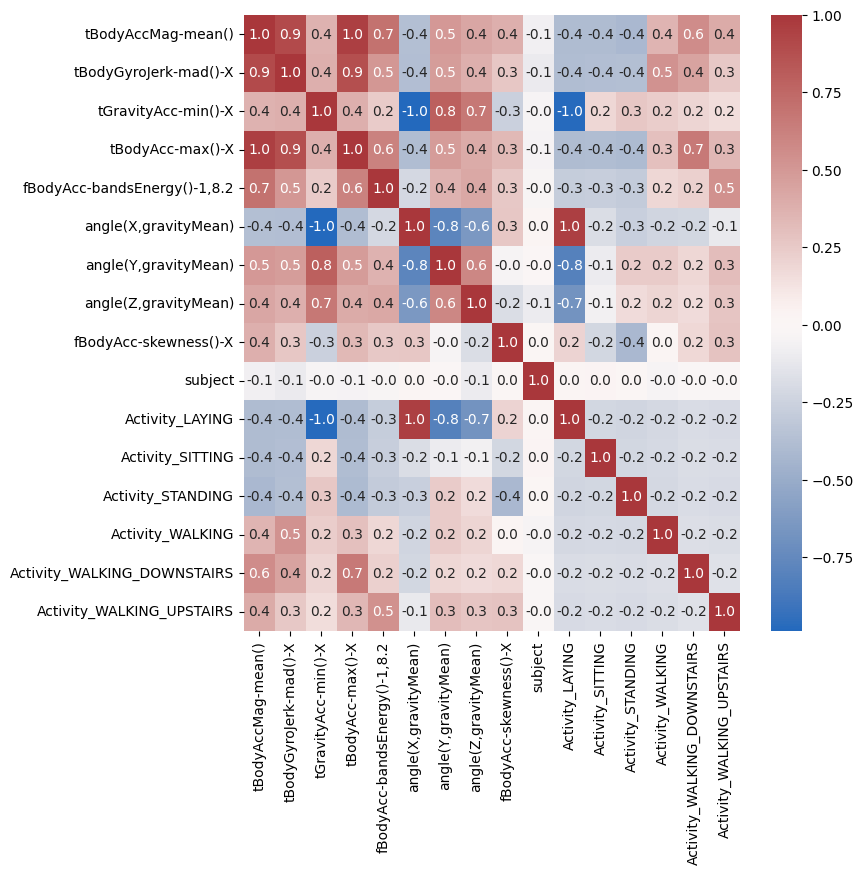

In [52]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_encoded.corr(), cmap="vlag", annot=True, fmt="0.1f") # plot a heatmap for easiear analysis



1.   В полученной таблице видны видны некоторые довольно тривиальные зависимости. Например, зависимости между средним ускорением тела, максимальным и минимальным ускорением, а также медианной величиной рывка тела по оси Х. Данные зависимости обусловлены физикой, описывающей представленную активность
2.   Заметна очень сильная обратная зависимость (-1) между минимумом гравитационной составляющей ускорения по оси Х и углом между осью Х и усредненной гравитационной составляющей ускорения. Это объясняется тем, что при увеличении соответсвующего угла, проекция ускорения на данную ось будет уменьшаться
3.  Существует сильная обратная зависимость между минимумом гравитационной составляющей ускорения по оси Х и целевой переменной Activity laying. Данная зависимость очевидным образом вытекает из пункта 2, т.к., когда человек лежит, соответсувующий угол (с осью X) максимален



Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

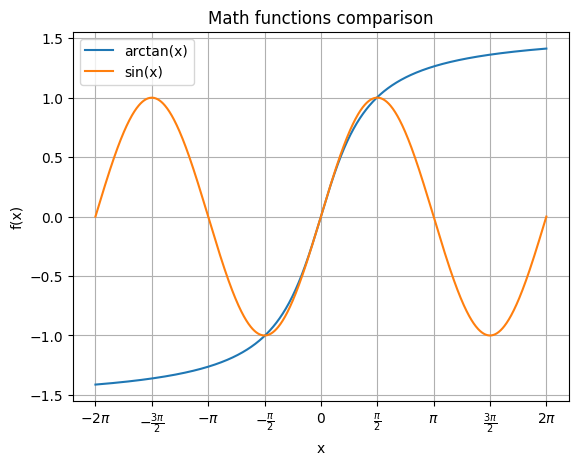

In [53]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_arctan = np.arctan(x)
y_sin = np.sin(x)

plt.xticks([-2*np.pi, -3*np.pi/2, -np.pi, -np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['$-2\pi$', r'$-\frac{3\pi}{2}$', r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.title("Math functions comparison")
plt.legend()

plt.grid()
plt.plot(x, y_arctan, label='arctan(x)')
plt.plot(x, y_sin, label='sin(x)')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

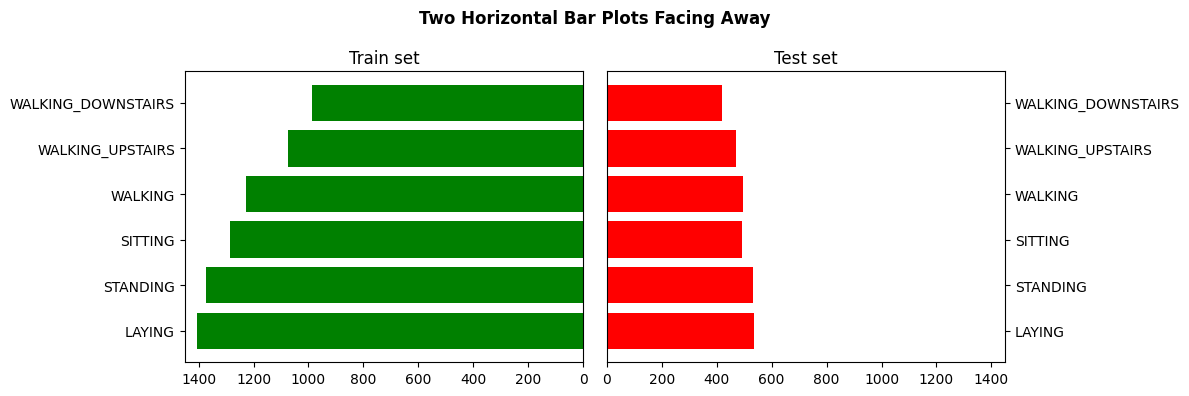

In [54]:
train_counts = list(train['Activity'].value_counts())
test_counts = list(test['Activity'].value_counts())

train_cat = list(train['Activity'].value_counts().index)
test_cat = list(test['Activity'].value_counts().index)

# Ensure the same order of categories
test_counts = [test_counts[test_cat.index(cat)] for cat in train_cat]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))


ax1.barh(train_cat, train_counts, color='green')
ax1.set_xlim(0, 1450)
ax1.set_title('Train set')

ax2.barh(train_cat, test_counts, color='red')
ax2.set_xlim(0, 1450)
ax2.set_title('Test set')


ax1.invert_xaxis()
ax2.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

fig.suptitle('Two Horizontal Bar Plots Facing Away', fontweight='bold')

plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

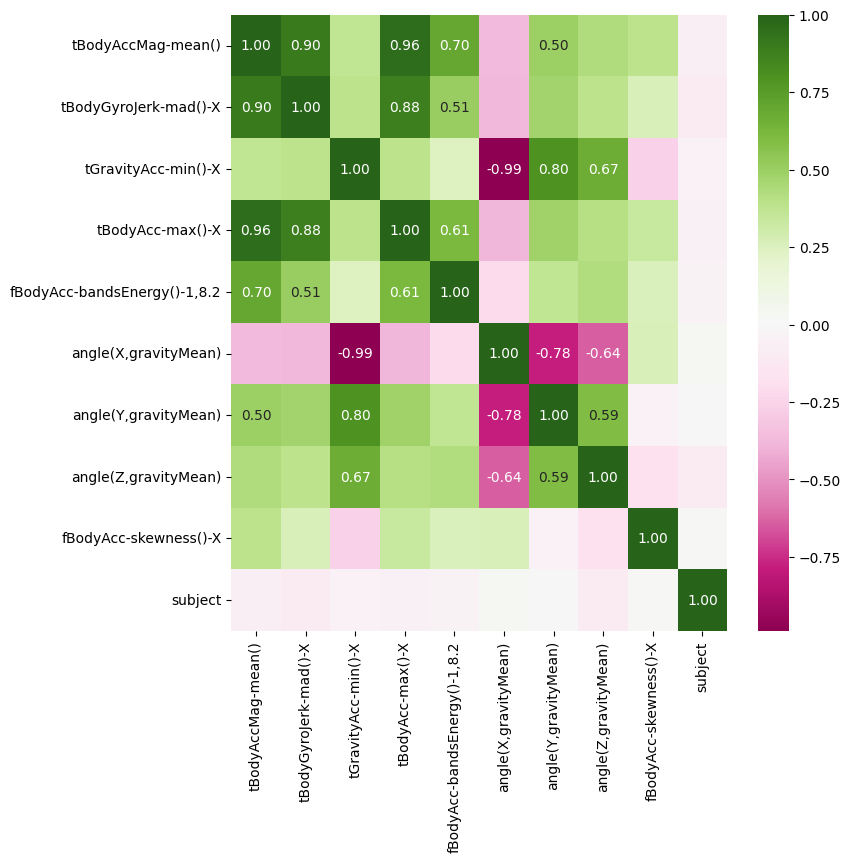

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(train.corr(), annot=True, fmt="0.2f", cmap='PiYG')
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")

Из рассмотрения стоит исключить признак **subject**, так как данный признак показывает лишь номер испытуемого и не отражает признака, который мог оказывать влияния на другие признаки и предствавлять интерес для нашего исследования

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

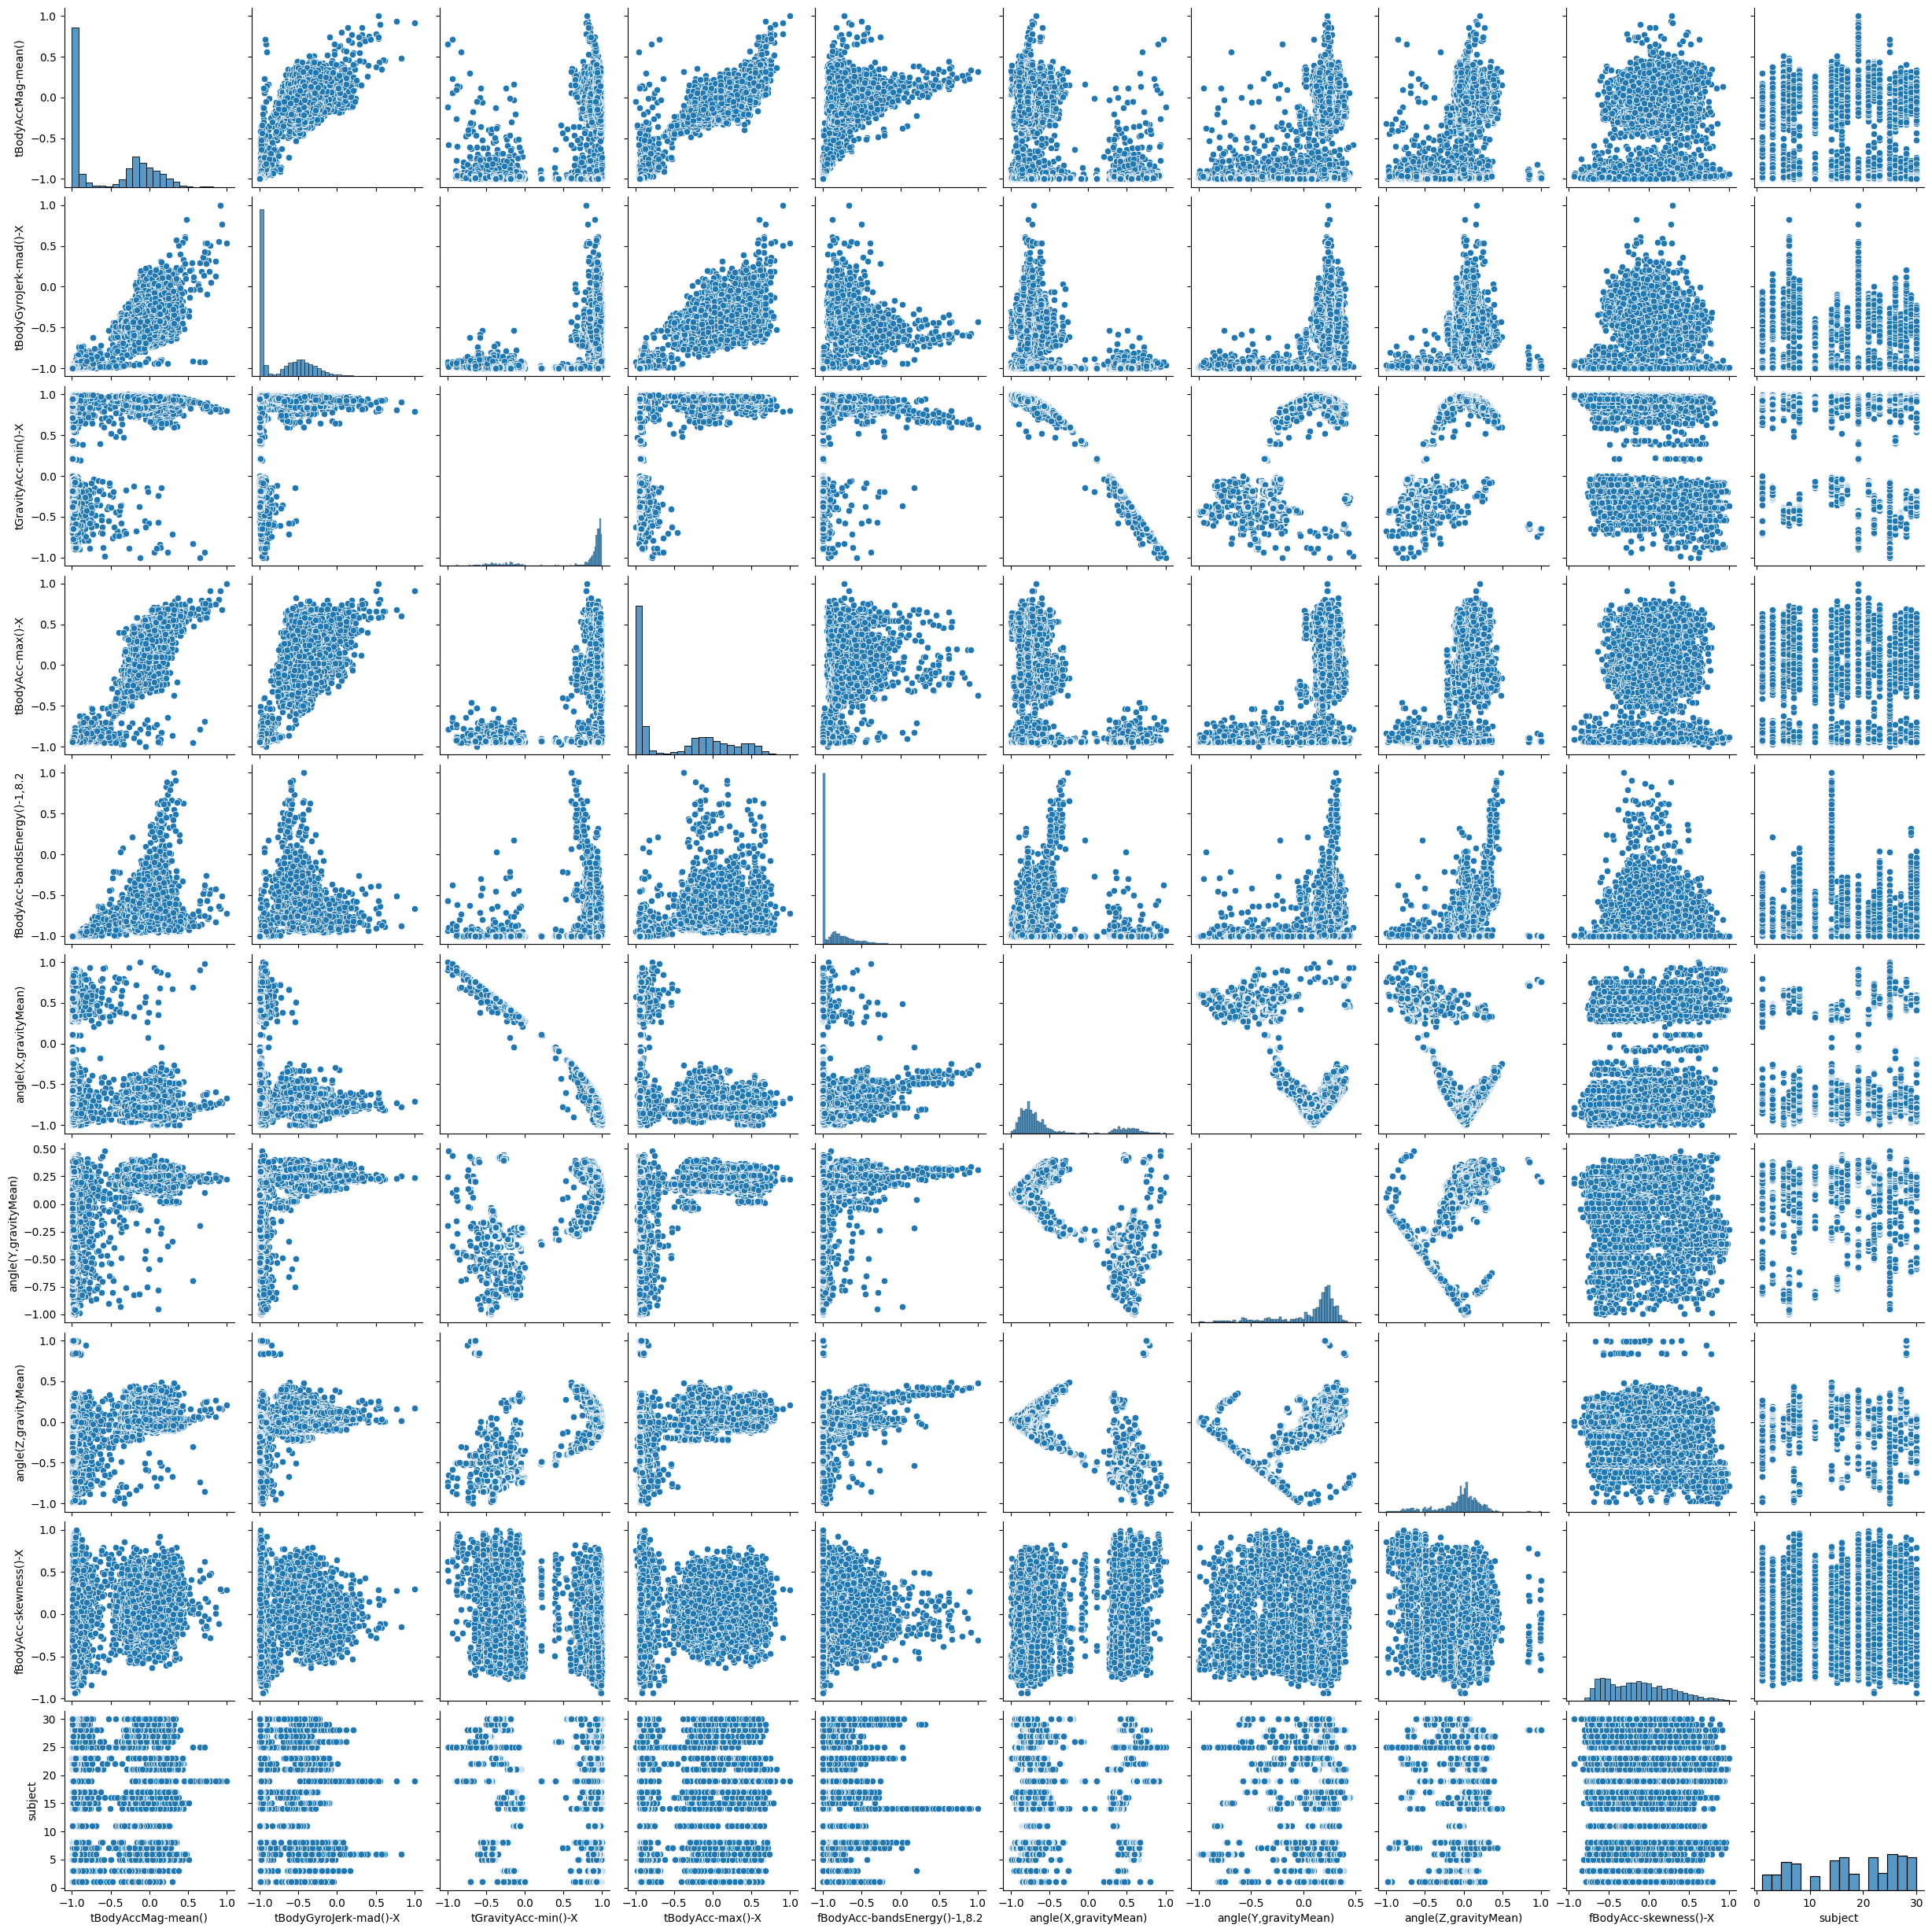

In [ ]:
sns.pairplot(train)



1.   Можно заметить, что графики для angle(Y, gravityMean) и angle(Z, gravityMean) практически идентичны
2.   Многие графики для angle(X, gravityMean) в некоторой степени похожи на отраженную (относительно 0.0) версию графиков для angle(Y, gravityMean). Заметным исключением из этого правила является график зависимости tGravityAcc-min()-X от этих признаков: в случае с angle(X, gravityMean) видна обратная зависимость параметров, но такой зависимости не видно для аналогичных графиков по другии осям
3.  Точки в некоторых графиках разбиваются на две ярковыраженные области. Примеры таких графиков: angle(X, gravityMean) от fBodyAcc-skewness()-X,  tGravityAcc-min()-X от fBodyAcc-skewness()-X, angle(X, gravityMean) от angle(Y, gravityMean)

Анализировать 100 графикоа **КРАЙНЕ НЕУДОБНО**



### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

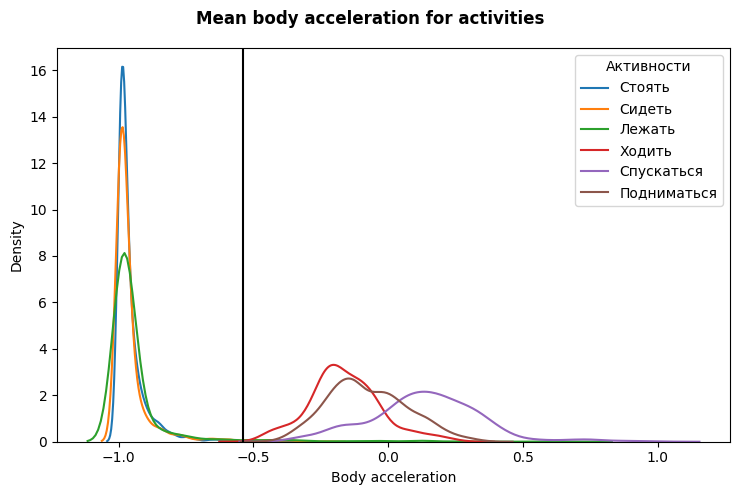

In [ ]:
def translate(s):
  engToRus = {"STANDING":"Стоять",
              "SITTING":"Сидеть",
              "LAYING":"Лежать",
              "WALKING":"Ходить",
              "WALKING_DOWNSTAIRS":"Спускаться",
              "WALKING_UPSTAIRS":"Подниматься"}
  return engToRus[s]

train_rus = train.copy()
train_rus = train_rus.rename(columns={'Activity' : 'Активности'})
train_rus['Активности'] = train_rus['Активности'].map(translate)

facet = sns.FacetGrid(data=train_rus, hue="Активности", legend_out=False, height=5, aspect=1.5, despine=False)
facet = facet.map(sns.kdeplot, "tBodyAccMag-mean()")
for ax in facet.axes.flat:
    ax.grid(False)


x_sep = -0.54
plt.axvline(x=x_sep, color='black', linestyle='-')


facet.add_legend()

plt.suptitle("Mean body acceleration for activities", fontweight='bold')
plt.xlabel("Body acceleration")
plt.tight_layout()
plt.show()

Видна следующая закономерность: усреднённая величина ускорения тела для каждого вида активности не выходит за пределы определеённого промежутка, сначала возрастая, затем достигая максимума и убывая после этого. Данные промежутки для усреднённой величины ускорения явным образом разделены на две группы: те, для которых пик рассматриваемого значения находится около -1 и те, для которых данный промежуток смещён ближе к 0.

Основываясь на выведенной закономерности, разделим все виды активности на 2 группы: статические (стоять, сидеть, лежать) и динамические(подниматься, ходить, спускаться).

In [ ]:
train_static_model_count = train_rus[(train_rus['Активности'].isin({'Стоять', 'Сидеть', 'Лежать'})) & (train_rus['tBodyAccMag-mean()'] < x_sep)].shape[0]
train_dynamic_model_count = train_rus[(train_rus['Активности'].isin({'Ходить', 'Спускаться', 'Подниматься'})) & (train_rus['tBodyAccMag-mean()'] >= x_sep)].shape[0]

right_predictions = train_static_model_count + train_dynamic_model_count


print(f"The proportion of correct answers = {round(right_predictions / train.shape[0] * 100, 2)}%")


The proportion of correct answers = 99.1%


Моё разделение (по значению ускорения = -0.54) даёт 99.1% правильных ответов. Признак среднее ускорение настолько хорошо разделяет две данные группы активностей потому что одна из этих групп подразумевает активное движение, а следоватьльно и ускорение, в то время, как другая группа наоборот не требует каких-либо резких движений

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

Text(0, 0.5, 'Angle')

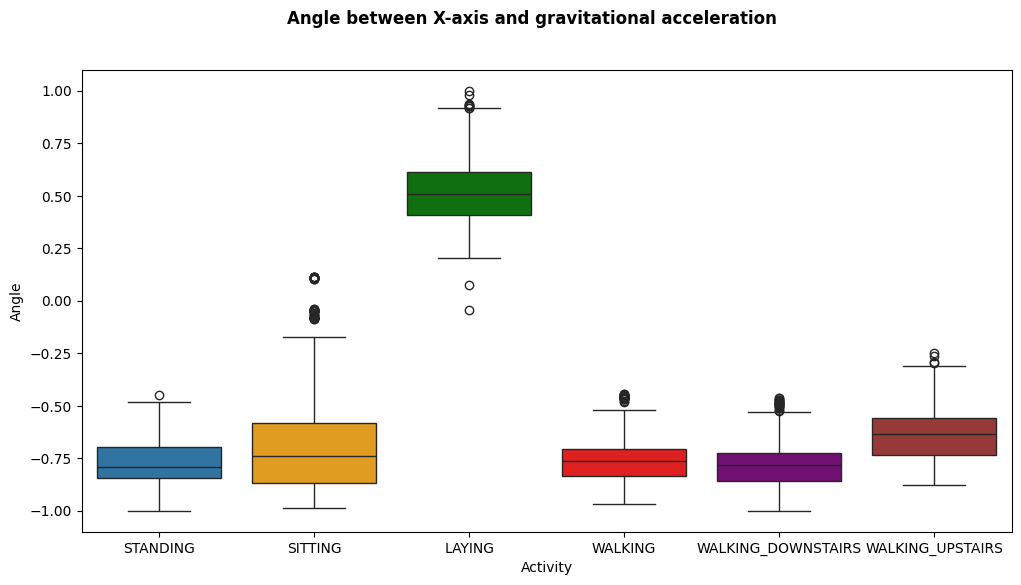

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(train, x='Activity', y='angle(X,gravityMean)', palette=[(31/255,119/255,180/255, 1), 'orange', 'green', 'red', 'purple', 'brown'])
plt.suptitle("Angle between X-axis and gravitational acceleration", fontweight='bold')
plt.ylabel("Angle")


По полученной визуализации можно сделать следующие выводы:

Медианное значение различных активностей (кроме LAYING) находится в пределах от -0.78 до -0.55, 25-ый квартиль для большинства активностей находится в районе -0.8

Категория, которая значительно выделяется по данному признаку - это LAYING. Медианное значение для нее около 0.5 и остальные значения квантилей превышают таковые для других категорий. Нижняя граница (исключая выбросы) для данной категории превышает верхние для остальных категорий. Так могло произойти из-за того, что положение лёжа для человека ассоциировано с довольно однозначным (горизонтальным) положением тела, а значит и смартфона на поясе, что отражается в виде значения рассматриваемого параметра

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

Text(0, 0.5, 'Maximal acceleration')

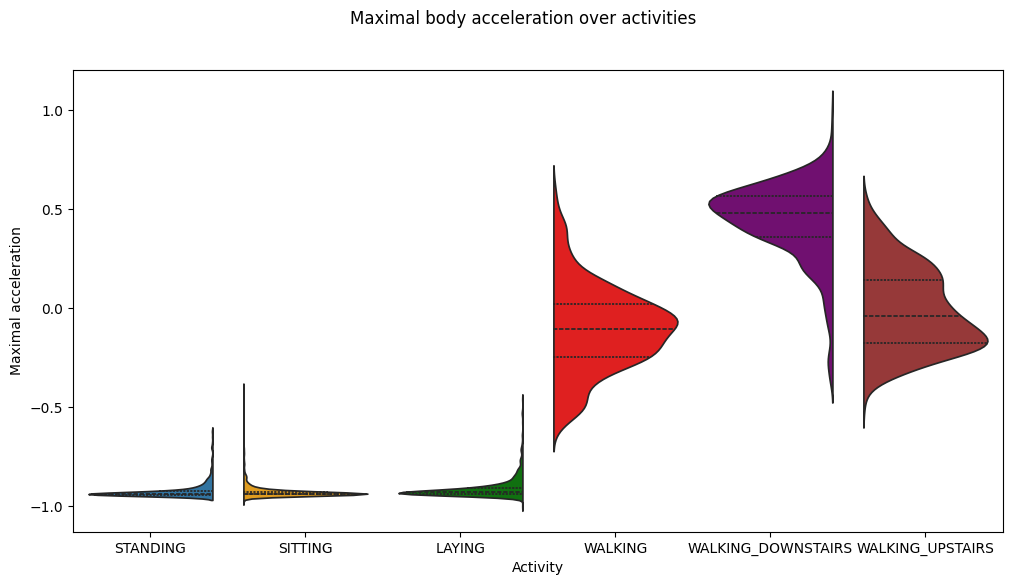

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(train, x='Activity', y='tBodyAcc-max()-X', palette=[(31/255,119/255,180/255, 1), 'orange', 'green', 'red', 'purple', 'brown'], split=True, inner="quart")
plt.suptitle("Maximal body acceleration over activities")
plt.ylabel("Maximal acceleration")

Среди представленных активностей выделяется активность WALKING_DOWNSTAIRS: даже 25-ый кваритль находится ввыше, чем 75-ый квартиль у всех остальных активностей, то есть значение макисмального ускорения при спуске по ступенькам смещено к 1 относительно всех остальных активностей. Это может быть связано с тем, что когда человек спускается на очередную ступеньку, она резко тормозит "падение" человека, из-за чего человек испытывает резкое ускорение, направленное вверх.

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

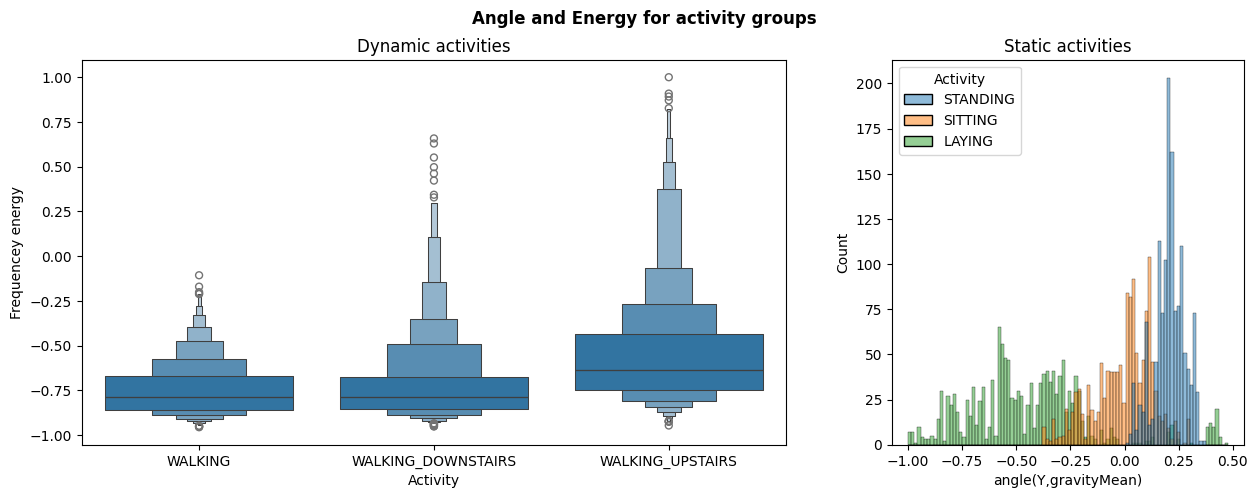

In [ ]:
import matplotlib.gridspec as gridspec

static_train = train[train['Activity'].isin({'STANDING', 'SITTING', 'LAYING'})]
dynamic_train = train[train['Activity'].isin({'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'})]

fig = plt.figure(figsize=(15, 5))
fig.add_gridspec(2, 1)


gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax0 = plt.subplot(gs[0])

plt.subplot(1, 2, 1)
plt.ylabel("Frequencey energy")
plt.title("Dynamic activities")
sns.boxenplot(dynamic_train, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2')

plt.subplot(1, 2, 2)
sns.histplot(static_train, hue='Activity', x='angle(Y,gravityMean)', bins=100)
plt.suptitle("Angle and Energy for activity groups", fontweight='bold')
plt.title("Static activities")
plt.show()

В графике по динамическим активностям выдляется категория WALKING_UPSTAIRS, все рассматриваемыые соответсвующие квантили для данной категории заметно выше чем в других категориях.

В графике по статическим активностям выделяется категория STANDING, угол (по оси Y) для этой категории в среднем выше, чем в других, и пик распределения угла тоже значительно смещен в сторону 0.5 относитльно остальных

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

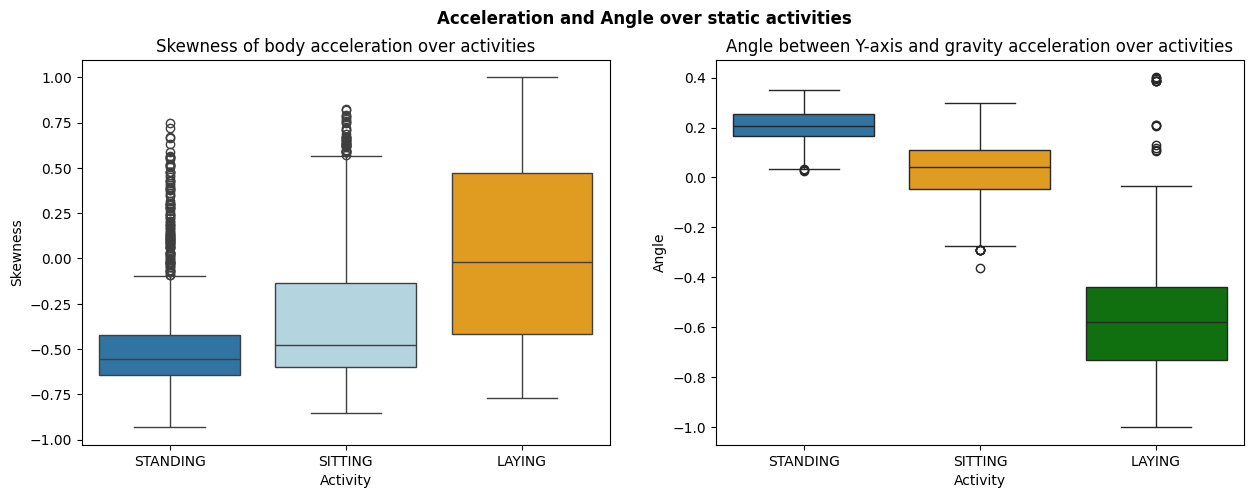

In [ ]:
static_train = train[train['Activity'].isin({'STANDING', 'SITTING', 'LAYING'})]
dynamic_train = train[train['Activity'].isin({'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'})]

fig = plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.ylabel("Skewness")
plt.title("Skewness of body acceleration over activities")
sns.boxplot(static_train, x='Activity', y='fBodyAcc-skewness()-X', palette=[(31/255,119/255,180/255, 1), 'lightblue', 'orange'])

plt.subplot(1, 2, 2)
plt.ylabel("Angle")
plt.title("Angle between Y-axis and gravity acceleration over activities")
sns.boxplot(static_train[static_train['fBodyAcc-skewness()-X'] < -0.376], x='Activity', y='angle(Y,gravityMean)',  palette=[(31/255,119/255,180/255, 1), 'orange', 'green'])

plt.suptitle("Acceleration and Angle over static activities", fontweight='bold')
plt.show()

Категории плохо разделимы по fBodyAcc-skewness()-X, так как категории STANDING  и SITTING имеют схожие значения медианы и наблюдения, имеющие fBodyAcc-skewness()-X < -0.376 имеют большой шанс относиться как к STANDING, так и к SITTING.

В распределении fBodyAcc-skewness()-X по активностям нет однозначаного значения skewness, которое бы разделяло категории, но можно сказать, что skewness для категории LAYING выше, чем для остальных категорий, а при skewness < -0.376 сложно сделать выбор между категориями STANDING и SITTING, так как для обеих категорий медиана находится около -0.5, а 25-квартиль около -0.6

Когда мы берём лишь часть наблюдений и строим распределение угла по разным категориям, то можно заметить четкое разделение категорий: большая часть значений в категории STANDING находится между 0.1 и 0.3, большая часть значений в категории SITTING находится между -0.1 и 0.1, в то время, как большинство значений angle для LAYING находится в промежутке от -0.8 до -0.4

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

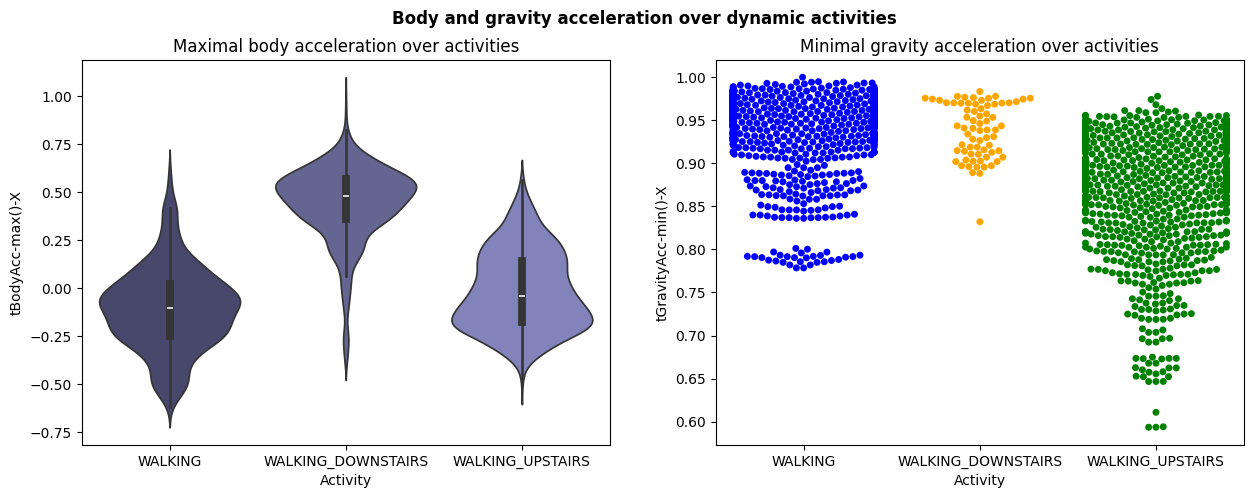

In [ ]:
fig = plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.ylabel("tBodyAcc-max()-X")
plt.title("Maximal body acceleration over activities")
sns.violinplot(dynamic_train, x='Activity', y='tBodyAcc-max()-X', palette=[(65/255, 66/255, 113/255), (92/255, 94/255, 153/255), (120/255, 122/255, 195/255)])

plt.subplot(1, 2, 2)
plt.ylabel("tGravityAcc-min()-X")
plt.title("Minimal gravity acceleration over activities")
sns.swarmplot(dynamic_train[dynamic_train['tBodyAcc-max()-X'] < 0.157], x='Activity', y='tGravityAcc-min()-X', palette=['blue', 'orange', 'green'])

plt.suptitle("Body and gravity acceleration over dynamic activities", fontweight='bold')
plt.show()

По первому графику видно, что признак tGravityAcc-min()-X принимает более высокие значения для наблюдений в категории WALKING_DOWNSTAIRS, так 25-ый квартиль для данной категории (примерно 0.3) превышает даже значения 75-ого квантиля для оставшихся категорий, составляющих примерно 0 и 0.15 соответсвенно.

К примечательным особенностям второго графика (выборка со значением tBodyAcc-max()-X < 0.157) можно отнести тот факт, что если значение признака tGravityAcc-min()-x меньше, чем 0.77, то можно наверняка сказать, что данное наблюдение относится к категории WALKING_UPSTAIRS

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 6min 35s, sys: 787 ms, total: 6min 36s
Wall time: 3min 55s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [ ]:
import plotly.express as px

px.scatter(df_2_comp, x='x', y='y', color='Activity', title='Activities')

На полученном графике хорошо выделяются кластеры для разных категорий активности. Активности можно отделить линиями на данном графике: категорию LAYING можно выделить линиями таким образом, чтобы не возникало пересечений с другими кластерами, в то время, как для других категорий при выделении их с помощью линий будут возникать некоторые пересечения, и наблюдения из одной категории могут быть отнесены к другой, но данные пересечения не очень значимы.

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [ ]:
px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity', title='Activities')

У точек на полученном графике снова видна структура с разделением на кластеры, но в этот раз граница между категорией SITTING и STANDING видна гораздо лучше. Разделение категорий WALKING, WALKING_UPSTAIRS и WALKING_DOWNSTAIRS тоже более заметное на трёхмерном графике, а категория LAYING так и осталась обособленной и хорошо отделимой от всех отсальных

### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шапргалка с готовыми идеями для такой задачи](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

Будем определять категорию активности следующим образом:


> Сначала определим, относится активность к группе STATIC или DYNAMIC с помощью найденного ранее значения x_sep



> Затем для каждой группы будем использовать наблюдения, полученные в процессе проведённого анализа для выделения категории. Будем использовать следующий подход: по графикам выделяем границы, хорошо отделяющие категории. Для некоторых границ указаны промежутки, в которых имеет смысл рассматривать данную границу, для остальных мне стало лень писать такие границы... С помощью найденных границ определяем категорию наблюдения. Таким образом, получаем некоторое подобие фильтра, в котором сначала определяются категории, в которых мы уверены больше всего, затем, если наблюдение не было выбрано на первом этапе, то переходим к границам, которые разделяют данные с уже меньшей точностью и так далее.




> Путём изменения границ в диапазонах, о которых говорилось ранее, находим такие значения, при которых модель даёт лучшие результаты на train, таким образом обучаем нашу модель вручную.






In [173]:
def predict_static(row: pd.Series) -> str:
  laying_angle_x_bound = 0.25
  if(row['angle(X,gravityMean)'] >= laying_angle_x_bound):
    return "LAYING"

  standing_angle_y_bound = 0.14
  if(row['angle(Y,gravityMean)'] >= standing_angle_y_bound):
    return "STANDING"

  return "SITTING"


def predict_dynamic(row: pd.Series) -> str:
  lower_walking_bound = 0.63
  upper_walking_bound = 0.97
  if(row['tGravityAcc-min()-X'] <= lower_walking_bound or row['tGravityAcc-min()-X'] >= upper_walking_bound):
    return "WALKING"


  walking_downstairs_bound = 0.23 # [0.22; 0.29]
  if(row['tBodyAcc-max()-X'] >= walking_downstairs_bound):
    return "WALKING_DOWNSTAIRS"

  walking_upstairs_bound = -0.77 # [-0.77; -0.62]

  if(row['fBodyAcc-bandsEnergy()-1,8.2'] >= walking_upstairs_bound):
    return "WALKING_UPSTAIRS"


  return "WALKING"


def predict_single(row: pd.Series) -> str:
  x_sep = -0.54
  return predict_dynamic(row) if row['tBodyAccMag-mean()'] > x_sep else predict_static(row)


def predict(df: pd.DataFrame):
  return df.apply(predict_single, axis=1)

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [174]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8173286180631121
Accuracy on test set => 0.7913131998642687


__Место для мема и/или фидбэка__

Мема не будет, но вот смешной енот

![link image](https://webmg.ru/wp-content/uploads/2023/01/10030-26.jpg)